## Analysis Questions:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
df_trans = pd.read_csv('/content/drive/MyDrive/NeoStats_Keerthana/Transaction Data.csv')
df_cust = pd.read_csv('/content/drive/MyDrive/NeoStats_Keerthana/Customer Data.csv')

###**1. Income Insights:**
How many customers have no annual income? Plot and present the data distribution
of these customers.

*To find out we are just calculating the number of people who have missing values in the Annual Income column*

In [ ]:
print("Customers with no annual income: ",df_cust['Annual Income'].isna().sum())

Customers with no annual income:  18


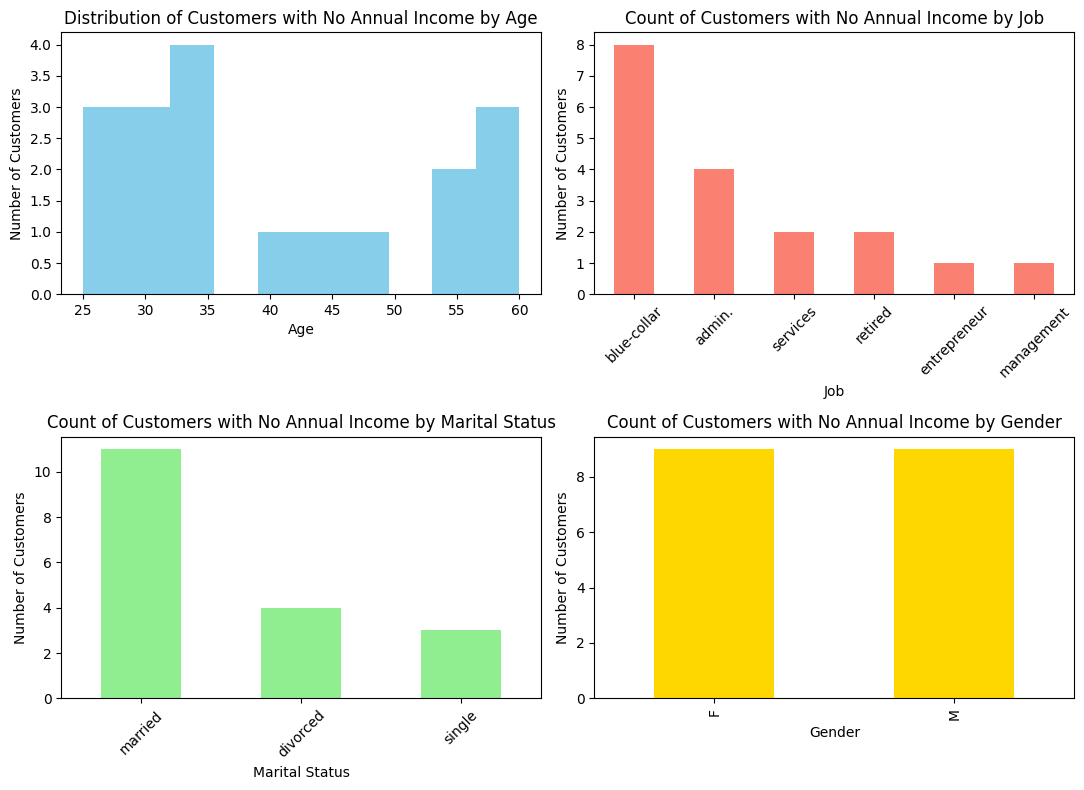

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(11, 8))

# Subplot 1: Distribution of Customers with No Annual Income by Age
axs[0, 0].hist(df_cust[df_cust['Annual Income'].isna()]['age'], color='skyblue')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Number of Customers')
axs[0, 0].set_title('Distribution of Customers with No Annual Income by Age')

# Subplot 2: Count of Customers with No Annual Income by Job
df_cust[df_cust['Annual Income'].isna()]['job'].value_counts().plot(kind='bar', ax=axs[0, 1], color='salmon')
axs[0, 1].set_xlabel('Job')
axs[0, 1].set_ylabel('Number of Customers')
axs[0, 1].set_title('Count of Customers with No Annual Income by Job')
axs[0, 1].tick_params(axis='x', rotation=45)

# Subplot 3: Count of Customers with No Annual Income by Marital Status
df_cust[df_cust['Annual Income'].isna()]['marital'].value_counts().plot(kind='bar', ax=axs[1, 0], color='lightgreen')
axs[1, 0].set_xlabel('Marital Status')
axs[1, 0].set_ylabel('Number of Customers')
axs[1, 0].set_title('Count of Customers with No Annual Income by Marital Status')
axs[1, 0].tick_params(axis='x', rotation=45)

# Subplot 4: Count of Customers with No Annual Income by Gender
df_cust[df_cust['Annual Income'].isna()]['Gender'].value_counts().plot(kind='bar', ax=axs[1, 1], color='gold')
axs[1, 1].set_xlabel('Gender')
axs[1, 1].set_ylabel('Number of Customers')
axs[1, 1].set_title('Count of Customers with No Annual Income by Gender')

plt.tight_layout()
plt.show()

1. Individuals with no annual income exhibit a widely dispersed age distribution, indicating a lack of a clear central tendency among ages in this group. This dispersion suggests a diverse age range among individuals with no reported annual income.

2. The data indicates a higher tendency for individuals in blue-collar professions to report no annual income. This skewness in data suggests that a notable proportion of individuals in blue-collar jobs might not have reported their annual income.

3. Among married customers, there's a higher prevalence of missing annual income data. This observation suggests a correlation between marital status and missing data, indicating a higher likelihood of missing entries in the annual income field for married individuals.

4. Gender does not appear to have a significant impact on the missing entries in the annual income data. This observation implies that the absence of reported annual income does not show a notable correlation with gender.

###**2. Loan-less Customers Profile:**
Filter out customers who don’t have any type of loan. Plot the distribution of their
Income, balance, and profession. How do these metrics differ from those with
loans?

In [ ]:
#print(df_trans['housing'].isna().sum())
#print(df_trans['loan'].isna().sum())

0
8


*We first filter out customers with no housing loan and no private loan or missing private loan and then we have done a grahical comparision between them and people with loans*

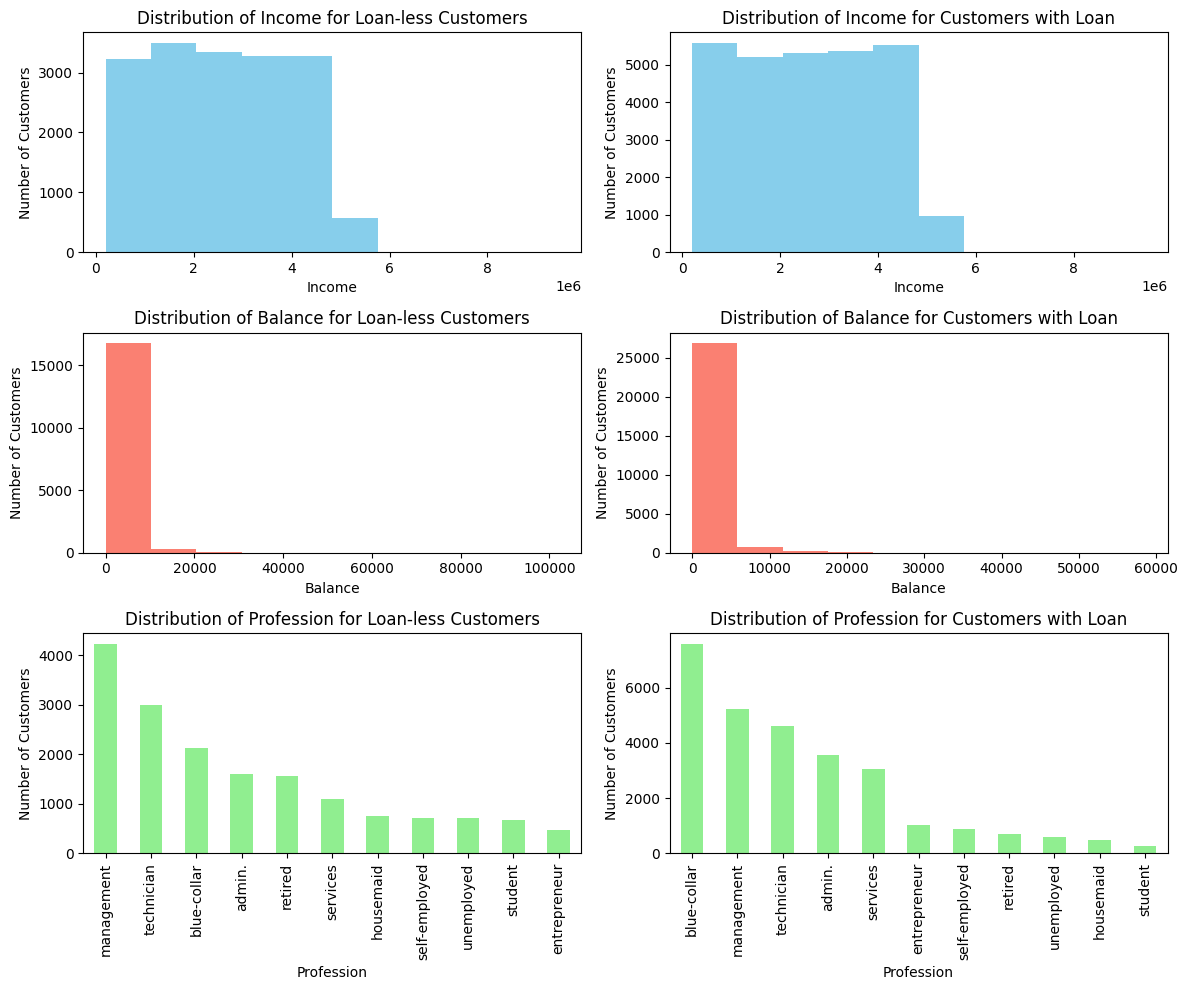

In [ ]:
import matplotlib.pyplot as plt

no_loan = df_trans[(df_trans['housing'] == 'no') & ((df_trans['loan'] == 'no') | df_trans['loan'].isna())]['Customer_number'].tolist()
loan_less_customers = df_cust[df_cust['Customer_number'].isin(no_loan)]
customers_with_loan = df_cust[~df_cust['Customer_number'].isin(no_loan)]

# Plotting the distribution of Income, Balance, and Profession for customers without loans
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# Plot 1: Distribution of Income for Loan-less Customers vs. Customers with Loan
axs[0,0].hist(loan_less_customers['Annual Income'].dropna(), color='skyblue')
axs[0,0].set_xlabel('Income')
axs[0,0].set_ylabel('Number of Customers')
axs[0,0].set_title('Distribution of Income for Loan-less Customers')

axs[0,1].hist(customers_with_loan['Annual Income'].dropna(), color='skyblue')
axs[0,1].set_xlabel('Income')
axs[0,1].set_ylabel('Number of Customers')
axs[0,1].set_title('Distribution of Income for Customers with Loan')

# Plot 2: Distribution of Balance for Loan-less Customers vs. Customers with Loan
balance_no_loan = df_trans[df_trans['Customer_number'].isin(no_loan)]['balance']
axs[1,0].hist(balance_no_loan.dropna(), color='salmon')
axs[1,0].set_xlabel('Balance')
axs[1,0].set_ylabel('Number of Customers')
axs[1,0].set_title('Distribution of Balance for Loan-less Customers')

balance_with_loan = df_trans[~df_trans['Customer_number'].isin(no_loan)]['balance']
axs[1,1].hist(balance_with_loan.dropna(), color='salmon')
axs[1,1].set_xlabel('Balance')
axs[1,1].set_ylabel('Number of Customers')
axs[1,1].set_title('Distribution of Balance for Customers with Loan')

# Plot 3: Distribution of Profession for Loan-less Customers vs. Customers with Loan
loan_less_customers['job'].value_counts().plot(kind='bar', ax=axs[2,0], color='lightgreen')
axs[2,0].set_xlabel('Profession')
axs[2,0].set_ylabel('Number of Customers')
axs[2,0].set_title('Distribution of Profession for Loan-less Customers')
axs[2,0].tick_params(axis='x', rotation=90)

customers_with_loan['job'].value_counts().plot(kind='bar', ax=axs[2,1], color='lightgreen')
axs[2,1].set_xlabel('Profession')
axs[2,1].set_ylabel('Number of Customers')
axs[2,1].set_title('Distribution of Profession for Customers with Loan')
axs[2,1].tick_params(axis='x', rotation=90)

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()


1. People with incomes below 1,00,000 tend to apply for loans more frequently than higher income groups, indicating a reliance on loans for various financial needs due to limited income resources.
Account Balance and Loan Status:

2. Customers with active loans maintain higher account balances, potentially for managing loan repayments or meeting loan approval criteria.
Loan Applications by Occupation:

3. Managerial professionals exhibit the lowest loan application frequency, indicating potential financial stability. In contrast, blue-collar workers, especially those in lower income brackets, apply for loans more often, possibly due to financial constraints or specific monetary requirements.

###**3. Loan and Insurance Analysis:**
Calculate the percentage of customers with a loan who have taken out insurance.
Visualize this data and discuss potential implications.

*First we filtered the customers who have some sort of loan, and in them how many have went for insurance, then the percentage was calculated.
Some graphs have also been displayed with some suitable inferences.*

In [ ]:
import matplotlib.pyplot as plt

# Categorize customers based on loan types
housing_no_personal = df_trans[(df_trans['housing'] == 'yes') & ((df_trans['loan'] == 'no') | df_trans['loan'].isna())]['Customer_number'].tolist()
no_housing_personal = df_trans[(df_trans['housing'] == 'no') & (df_trans['loan'] == 'yes')]['Customer_number'].tolist()
housing_personal = df_trans[(df_trans['housing'] == 'yes') & (df_trans['loan'] == 'yes')]['Customer_number'].tolist()



# Calculate percentages
total_customers_with_loan = len(housing_no_personal)+len(no_housing_personal)+len(housing_personal)
combined_list = housing_no_personal + no_housing_personal + housing_personal
loan_and_insurance=len(df_trans[(df_trans['Customer_number'].isin(combined_customer_numbers)) & (df_trans['Insurance'] == 'yes')])

print("percentage of customers with a loan who have taken out insurance: ",round(loan_and_insurance*100/total_customers_with_loan,2),'%')

percentage of customers with a loan who have taken out insurance:  2.15 %


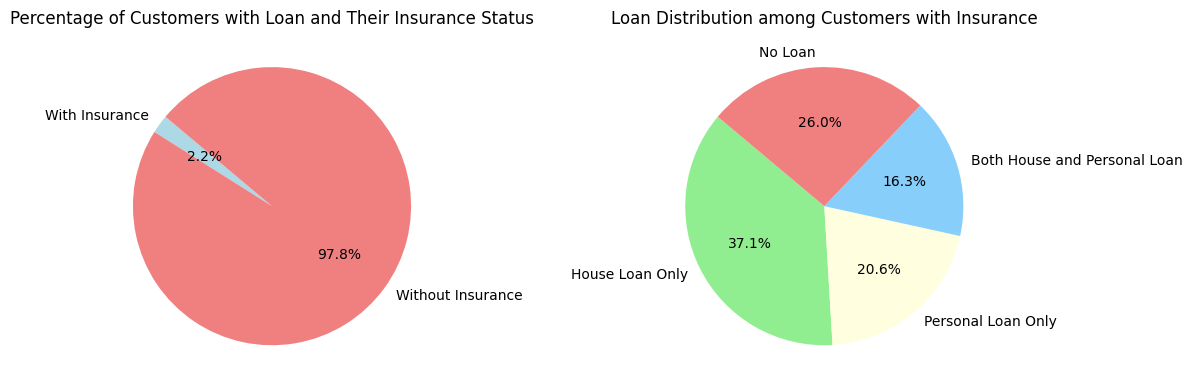

In [ ]:
import matplotlib.pyplot as plt

# Calculation of percentages
insurance_with_loan = (loan_and_insurance / total_customers_with_loan) * 100
no_insurance_with_loan = 100 - insurance_with_loan

# Calculation of counts for different loan categories among customers with insurance
insurance_housing_no_personal = len(df_trans[(df_trans['Customer_number'].isin(housing_no_personal)) & (df_trans['Insurance'] == 'yes')])
insurance_no_housing_personal = len(df_trans[(df_trans['Customer_number'].isin(no_housing_personal)) & (df_trans['Insurance'] == 'yes')])
insurance_housing_personal = len(df_trans[(df_trans['Customer_number'].isin(housing_personal)) & (df_trans['Insurance'] == 'yes')])
insurance_noloan = len(df_trans[df_trans['Insurance'] == 'yes']) - (insurance_housing_no_personal + insurance_no_housing_personal + insurance_housing_personal)


fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Subplot 1: Percentage of Customers with Loan and Their Insurance Status
labels_loan_status = ['With Insurance', 'Without Insurance']
sizes_loan_status = [insurance_with_loan, no_insurance_with_loan]
colors_loan_status = ['lightblue', 'lightcoral']

axs[0].pie(sizes_loan_status, labels=labels_loan_status, colors=colors_loan_status, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Percentage of Customers with Loan and Their Insurance Status')

# Subplot 2: Loan Distribution among Customers with Insurance
labels_loan_distribution = ['House Loan Only', 'Personal Loan Only', 'Both House and Personal Loan', 'No Loan']
sizes_loan_distribution = [insurance_housing_no_personal, insurance_no_housing_personal, insurance_housing_personal, insurance_noloan]
colors_loan_distribution = ['lightgreen', 'lightyellow', 'lightskyblue', 'lightcoral']

axs[1].pie(sizes_loan_distribution, labels=labels_loan_distribution, colors=colors_loan_distribution, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Loan Distribution among Customers with Insurance')


plt.tight_layout()
plt.show()


1. The observation that 2.2% of individuals with loans have taken insurance indicate a significant portion of borrowers might be exposed to potential financial risks. Lack of insurance coverage could leave them vulnerable to unforeseen events that could impact their ability to repay loans, such as health emergencies, accidents, or property damages.

2. Among those with both loans and insurance, a higher proportion from home loans have opted for insurance compared to those with personal loans. This trend implies that individuals with home loans might consider safeguarding their assets (such as homes) by choosing insurance coverage more often than individuals with personal loans.

###**4. Communication Strategy Insights:** Analyse and summarize the best Contact method (with the highest success percentage) to contact people to ascertain the status of term deposit subscriptions.

*Firstly in the preprocessing.py we have merged the Tel into telephones and Mobiles into Cellular and have replaced all the junk values into nan. Hence first we show the unique values we have in the data right now.*

In [ ]:
df_trans["contact"].unique()

array([nan, 'cellular', 'telephone'], dtype=object)

In [ ]:

# Calculate success rate for each contact method
success_rates = df_trans[df_trans['Term Deposit']=='yes']['contact'].value_counts()/len(df_trans[df_trans['Term Deposit']=='yes'])*100
print(success_rates)

# Get the contact method with the highest success rate
best_contact_method = success_rates.idxmax()
highest_success_rate = success_rates.max()

print("\nThe contact method with the highest success rate is ",best_contact_method,' with a success rate of', round(highest_success_rate,2),"%")

cellular     82.586500
telephone     7.354888
Name: contact, dtype: float64

The contact method with the highest success rate is  cellular  with a success rate of 82.59 %


Cellular mode of contact has the highest success rate. There might not be any relationship between the Mode of Contact and Success Rates. The potential reason can be the massive usage of Mobile Phones among People with very rare houses still using the Landlines.

###**5. Age and Home Loans:** Determine which age group has the highest percentage of home loans. Present this data visually and discuss possible reasons.

*First, we filter out the people with home loans, then we create an age group starting from the minimum age to the maximum age in the dataset with height for each age groups as 10.*

In [ ]:
cust_no_with_loans = df_trans[df_trans['housing'] == 'yes']['Customer_number'].tolist()
cust_with_loans_df = df_cust[df_cust['Customer_number'].isin(cust_no_with_loans)]

cust_with_loans_df['age'] = cust_with_loans_df['age'].dropna()
min_age = int(cust_with_loans_df['age'].min())
max_age = int(cust_with_loans_df['age'].max())
age_groups = list(range(min_age, max_age, 10))

labels = [f"{age}-{age+10}" for age in age_groups[:-1]]  # Creating labels like '30-40', '40-50', etc.
cust_with_loans_df['Age_Group'] = pd.cut(cust_with_loans_df['age'], bins=age_groups, labels=labels, right=False)
people_per_age_group = cust_with_loans_df['Age_Group'].value_counts()


total_people = people_per_age_group.sum()
percentage_per_age_group = people_per_age_group / total_people * 100

In [ ]:
print("Housing Loan Taken by Age Group (in %).")
percentage_per_age_group

Housing Loan Taken by Age Group (in %).


30-40    45.738578
40-50    26.806719
50-60    14.317553
20-30    12.208510
60-70     0.928639
Name: Age_Group, dtype: float64

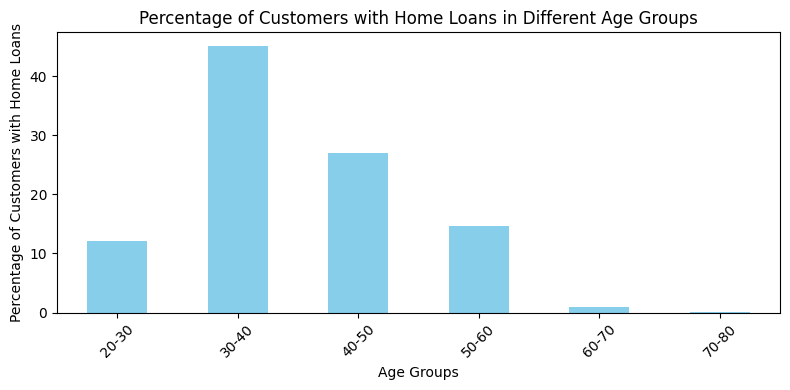

In [ ]:
# Plotting the data
plt.figure(figsize=(8, 4))
percentage_per_age_group.sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Age Groups')
plt.ylabel('Percentage of Customers with Home Loans')
plt.title('Percentage of Customers with Home Loans in Different Age Groups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Individuals aged 30-40 exhibit the highest interest in home loans, representing nearly half of the total home loan applications. This group likely includes those establishing themselves in their careers and seeking property ownership or investment.

The 40-50 age group also displays considerable interest in home loans, potentially reflecting a focus on financial stability and housing planning among mid-career individuals.

Home loan applications among individuals aged 60-70 are minimal, indicating a reduced inclination towards new property investments or homeownership in this age category.


###**6. Income and Age Relationship:** Investigate any relationships between annual income and age group. Use appropriate plots and statistics to present the findings.

*Like before, we have created age groups with a class width of 10 starting from the minimal age to the maximum. We counted the Median of the Annual Income falling under each Age Bracket as Mean in these cases can be misleading as it is prone to outliers.*

<ipython-input-181-3c61c3257f3c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cust['age'] = df_cust['age'].dropna()
<ipython-input-181-3c61c3257f3c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cust['Age_Group'] = pd.cut(df_cust['age'], bins=age_bins, labels=labels, right=False)


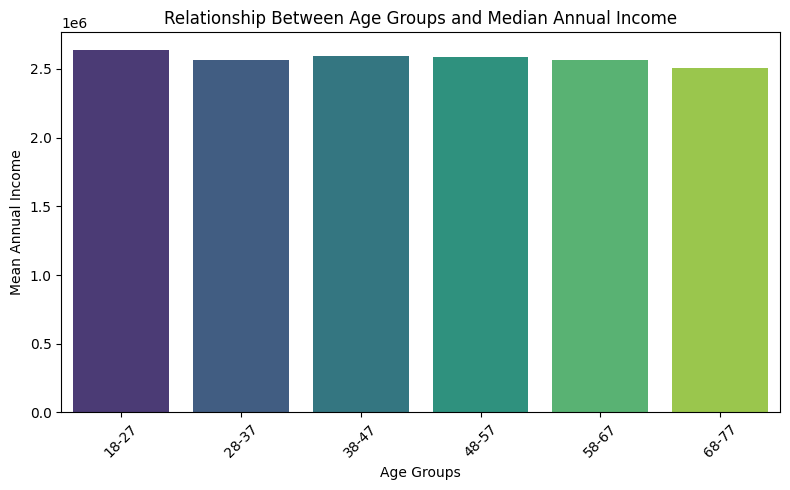

In [ ]:
import seaborn as sns

df_cust['age'] = df_cust['age'].dropna()


age_bins = list(range(int(df_cust['age'].min()), int(df_cust['age'].max()), 10))
labels = [f"{age}-{age+9}" for age in age_bins[:-1]]

df_cust['Age_Group'] = pd.cut(df_cust['age'], bins=age_bins, labels=labels, right=False)

# Grouping by age group and calculating median income
income_by_age_group = df_cust.groupby('Age_Group')['Annual Income'].median()

# Plotting the relationship between age groups and mean annual income
plt.figure(figsize=(8, 5))
sns.barplot(x=income_by_age_group.index, y=income_by_age_group.values, palette='viridis')
plt.xlabel('Age Groups')
plt.ylabel('Mean Annual Income')
plt.title('Relationship Between Age Groups and Median Annual Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


As we see, there is no significan relationship between Income in varied Age Groups

To further prove, we will be taking help of statisical test.

For that, first we see if the distribution of Annual Income follows a Normal Distribution which is our underlying assumption with the help of Shapiro Wilk's Test.

In [ ]:
from scipy.stats import shapiro

annual_income = df_cust['Annual Income'].dropna()  # Dropping any NaN values

# Performing Shapiro-Wilk test for normality
statistic, p_value = shapiro(annual_income)


print(f"Shapiro-Wilk test statistic: {statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:  # significance level (alpha)
    print("The test suggests that the data significantly deviates from a normal distribution.")
else:
    print("The test suggests that the data does not significantly deviate from a normal distribution.")


Shapiro-Wilk test statistic: 0.9557916522026062
P-value: 0.0
The test suggests that the data significantly deviates from a normal distribution.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


As our data violates the assumption, we are going for a non parametric test to see the signifance of Annual Income on Age Groups. Thus we are conducting a Kruskal Wallis Test with the null hypothesis, that there is no significant difference in median income among age groups.

In [ ]:
from scipy.stats import kruskal


data = [df_cust[df_cust['Age_Group'] == age]['Annual Income'].values
        for age in df_cust['Age_Group'].unique()
        if df_cust[df_cust['Age_Group'] == age]['Annual Income'].values.size > 0]

# Performing Kruskal-Wallis test for median income among different age groups
statistic, p_value = kruskal(*data)


print(f"Kruskal-Wallis H-test statistic: {statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The test suggests there are significant differences in median income among age groups.")
else:
    print("There is no sufficient evidence to suggest significant differences in median income among age groups.")


Kruskal-Wallis H-test statistic: 4.175707288556219
P-value: 0.652911979400175
There is no sufficient evidence to suggest significant differences in median income among age groups.


The absence of a clear link between age groups and annual income suggests that people within the same age range might have varied income levels. This highlights the importance of personalized financial approaches rather than assuming similar financial situations based solely on age.